In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('GE.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-29,72.615143,74.137390,72.615143,73.887589,73.568665,11009426
2022-03-30,73.083527,74.270103,72.833725,73.832947,73.514252,7216642
2022-03-31,73.185013,73.341141,71.405151,71.428574,71.120262,10537122
2022-04-01,71.896957,72.256050,71.124123,72.201408,71.889755,7226505
2022-04-04,71.959404,72.068695,70.960190,71.834503,71.524437,6583828


In [3]:
cols = list(df)[0:5]

In [4]:
cols

['Open', 'High', 'Low', 'Close', 'Adj Close']

In [5]:
df1 = df[cols]

In [6]:
df1.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-03-29,72.615143,74.137390,72.615143,73.887589,73.568665
2022-03-30,73.083527,74.270103,72.833725,73.832947,73.514252
2022-03-31,73.185013,73.341141,71.405151,71.428574,71.120262
2022-04-01,71.896957,72.256050,71.124123,72.201408,71.889755
2022-04-04,71.959404,72.068695,70.960190,71.834503,71.524437


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

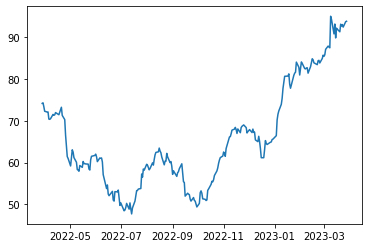

In [8]:
plt.plot(df1.High)

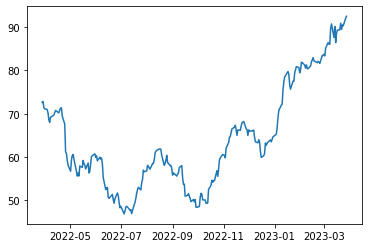

In [9]:
plt.plot(df1.Low)

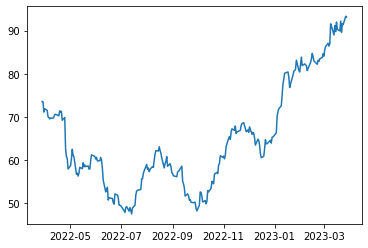

In [10]:
plt.plot(df1['Adj Close'])

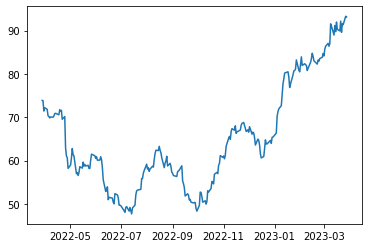

In [11]:
plt.plot(df1.Close)

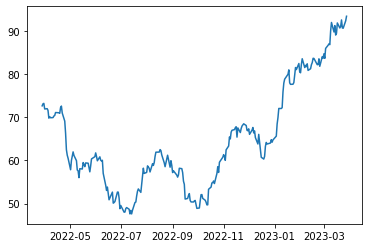

In [12]:
plt.plot(df1.Open)

In [13]:
len(df1)

251

In [14]:
df1.shape

(251, 5)

In [15]:
train = df1.iloc[:210]
test = df1.iloc[210:]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
df1.head(),df1.tail()

(                 Open       High        Low      Close  Adj Close
 Date                                                             
 2022-03-29  72.615143  74.137390  72.615143  73.887589  73.568665
 2022-03-30  73.083527  74.270103  72.833725  73.832947  73.514252
 2022-03-31  73.185013  73.341141  71.405151  71.428574  71.120262
 2022-04-01  71.896957  72.256050  71.124123  72.201408  71.889755
 2022-04-04  71.959404  72.068695  70.960190  71.834503  71.524437,
                  Open       High        Low      Close  Adj Close
 Date                                                             
 2023-03-22  92.489998  92.599998  89.550003  89.589996  89.589996
 2023-03-23  90.629997  92.949997  90.529999  91.589996  91.589996
 2023-03-24  90.570000  92.349998  90.320000  91.370003  91.370003
 2023-03-27  92.279999  93.639999  92.110001  93.309998  93.309998
 2023-03-28  93.339996  93.739998  92.559998  93.139999  93.139999)

In [18]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [19]:
scaled_train[:10]

array([[0.73819816, 0.72817428, 0.7571579 , 0.73713477, 0.73087578],
       [0.75203073, 0.73183573, 0.76356487, 0.73559732, 0.72934787],
       [0.75502787, 0.7062064 , 0.72169115, 0.66794606, 0.66212507],
       [0.7169883 , 0.67626959, 0.71345378, 0.68969111, 0.6837323 ],
       [0.71883252, 0.67110061, 0.70864865, 0.67936759, 0.67347423],
       [0.70684438, 0.67153147, 0.68599565, 0.63719551, 0.63156918],
       [0.65405006, 0.62479556, 0.63817274, 0.63302219, 0.62742227],
       [0.66442449, 0.62285717, 0.62146896, 0.62313808, 0.6176006 ],
       [0.65681649, 0.62694929, 0.65647813, 0.62928807, 0.62371178],
       [0.65796921, 0.65537857, 0.66585961, 0.62775062, 0.62218432]])

In [20]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
# define generator
n_input = 3
n_features = 5
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [22]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.73819816 0.72817428 0.7571579  0.73713477 0.73087578 0.75203073
 0.73183573 0.76356487 0.73559732 0.72934787 0.75502787 0.7062064
 0.72169115 0.66794606 0.66212507]
Predict this y: 
 [[0.7169883  0.67626959 0.71345378 0.68969111 0.6837323 ]]


In [23]:
# We do the same thing, but now instead for 12 days
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [24]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
     

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(n_input, n_features)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(5))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            11200     
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 51,855
Trainable params: 51,855
Non-trainable params: 0
_________________________________________________________________


In [27]:
# fit model
model.fit(generator,epochs=30)

Epoch 1/30
198/198 [==============================] - 11s 13ms/step - loss: 0.0267
Epoch 2/30
198/198 [==============================] - 3s 13ms/step - loss: 0.0153
Epoch 3/30
198/198 [==============================] - 2s 12ms/step - loss: 0.0132
Epoch 4/30
198/198 [==============================] - 2s 13ms/step - loss: 0.0079
Epoch 5/30
198/198 [==============================] - 3s 13ms/step - loss: 0.0049
Epoch 6/30
198/198 [==============================] - 2s 12ms/step - loss: 0.0040
Epoch 7/30
198/198 [==============================] - 2s 12ms/step - loss: 0.0032
Epoch 8/30
198/198 [==============================] - 2s 12ms/step - loss: 0.0025
Epoch 9/30
198/198 [==============================] - 3s 13ms/step - loss: 0.0023
Epoch 10/30
198/198 [==============================] - 3s 14ms/step - loss: 0.0023
Epoch 11/30
198/198 [==============================] - 4s 22ms/step - loss: 0.0018
Epoch 12/30
198/198 [==============================] - 2s 13ms/step - loss: 0.0019
Epoch 13/30


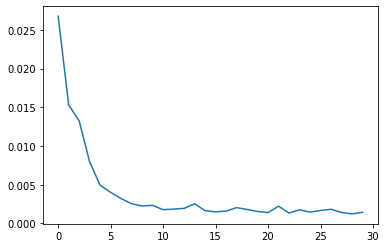

In [28]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [29]:
last_train_batch = scaled_train[-n_input:]

In [30]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [31]:
model.predict(last_train_batch)
     

1/1 [==============================] - 2s 2s/step


array([[0.99882245, 0.9760431 , 0.9905135 , 0.97544837, 0.9714358 ]],
      dtype=float32)

In [32]:
scaled_test[0]

array([1.02746529, 0.96578943, 0.99325823, 0.93247176, 0.93267072])

In [33]:

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 22ms/step


In [34]:
test_predictions

[array([0.99882245, 0.9760431 , 0.9905135 , 0.97544837, 0.9714358 ],
       dtype=float32),
 array([0.9621172 , 0.93624073, 0.9551889 , 0.9372723 , 0.92844754],
       dtype=float32),
 array([0.9233959, 0.8996667, 0.9142591, 0.8964504, 0.8871499],
       dtype=float32),
 array([0.8932524 , 0.8716203 , 0.8817673 , 0.86493886, 0.8562929 ],
       dtype=float32),
 array([0.8700794 , 0.84972215, 0.8568565 , 0.8409666 , 0.83285666],
       dtype=float32),
 array([0.85030216, 0.8306279 , 0.83592415, 0.8207128 , 0.81281316],
       dtype=float32),
 array([0.83143187, 0.81214744, 0.81623805, 0.8016032 , 0.79359627],
       dtype=float32),
 array([0.8124872 , 0.7935072 , 0.79676783, 0.7825415 , 0.7744009 ],
       dtype=float32),
 array([0.79341495, 0.77466726, 0.7773542 , 0.76341605, 0.7552611 ],
       dtype=float32),
 array([0.7744714 , 0.75598264, 0.7582316 , 0.74448717, 0.73643   ],
       dtype=float32),
 array([0.75592923, 0.7377335 , 0.73966384, 0.7260699 , 0.7180977 ],
       dtype=flo

In [35]:
true_predictions = scaler.inverse_transform(test_predictions)

In [36]:
true_predictions

array([[81.44013006, 83.12165524, 80.57635843, 82.35742091, 82.13567319],
       [80.19725509, 81.67897654, 79.37121484, 81.00061706, 80.60474286],
       [78.88611415, 80.35331336, 77.97484423, 79.54977785, 79.13401829],
       [77.8654265 , 79.33674114, 76.86634614, 78.42983551, 78.03511622],
       [77.08076748, 78.54301973, 76.01648514, 77.57784417, 77.2004865 ],
       [76.41109132, 77.85092939, 75.3023512 , 76.85801076, 76.48668222],
       [75.77212516, 77.18108504, 74.63073543, 76.17884198, 75.80231535],
       [75.1306402 , 76.50545073, 73.96648495, 75.50137638, 75.11871478],
       [74.48483614, 75.8225768 , 73.30416424, 74.82164411, 74.43709467],
       [73.84338952, 75.14533296, 72.65177305, 74.14889829, 73.76646583],
       [73.21553394, 74.48387325, 72.01831158, 73.49433674, 73.11360176],
       [72.60507988, 73.84316233, 71.4085443 , 72.86070065, 72.48278603],
       [72.01072556, 73.21481341, 70.81715159, 72.24241865, 71.87304857],
       [71.42927808, 72.60330938, 70.2

In [37]:
p56 = pd.DataFrame(true_predictions)

In [38]:
p56.head()

,0,1,2,3,4
0,81.440130,83.121655,80.576358,82.357421,82.135673
1,80.197255,81.678977,79.371215,81.000617,80.604743
2,78.886114,80.353313,77.974844,79.549778,79.134018
3,77.865427,79.336741,76.866346,78.429836,78.035116
4,77.080767,78.543020,76.016485,77.577844,77.200487


In [39]:
test.reset_index(inplace=True)

In [40]:
test.head()

,Date,Open,High,Low,Close,Adj Close
0,2023-01-30,82.410004,82.750000,80.669998,80.830002,80.755142
1,2023-01-31,80.449997,80.910004,79.470001,80.480003,80.405464
2,2023-02-01,80.269997,82.470001,80.010002,82.320000,82.243759
3,2023-02-02,82.190002,84.029999,81.900002,83.940002,83.862259
4,2023-02-03,83.510002,83.690002,81.820000,81.959999,81.884094


In [62]:
#test =test.drop(['level_0','index'],axis=1)

In [42]:
test.head()

,Date,Open,High,Low,Close,Adj Close
0,2023-01-30,82.410004,82.750000,80.669998,80.830002,80.755142
1,2023-01-31,80.449997,80.910004,79.470001,80.480003,80.405464
2,2023-02-01,80.269997,82.470001,80.010002,82.320000,82.243759
3,2023-02-02,82.190002,84.029999,81.900002,83.940002,83.862259
4,2023-02-03,83.510002,83.690002,81.820000,81.959999,81.884094


In [43]:
p56.head()

,0,1,2,3,4
0,81.440130,83.121655,80.576358,82.357421,82.135673
1,80.197255,81.678977,79.371215,81.000617,80.604743
2,78.886114,80.353313,77.974844,79.549778,79.134018
3,77.865427,79.336741,76.866346,78.429836,78.035116
4,77.080767,78.543020,76.016485,77.577844,77.200487


In [44]:
new_cols = ['p1', 'p2', 'p3','p4','p5']

In [45]:
p56.columns = new_cols

In [46]:
p56.head()

,p1,p2,p3,p4,p5
0,81.440130,83.121655,80.576358,82.357421,82.135673
1,80.197255,81.678977,79.371215,81.000617,80.604743
2,78.886114,80.353313,77.974844,79.549778,79.134018
3,77.865427,79.336741,76.866346,78.429836,78.035116
4,77.080767,78.543020,76.016485,77.577844,77.200487


In [47]:
new_test = pd.concat([test,p56],axis=1)

In [48]:
new_test.head(50)

,Date,Open,High,Low,Close,Adj Close,p1,p2,p3,p4,p5
0,2023-01-30,82.410004,82.750000,80.669998,80.830002,80.755142,81.440130,83.121655,80.576358,82.357421,82.135673
1,2023-01-31,80.449997,80.910004,79.470001,80.480003,80.405464,80.197255,81.678977,79.371215,81.000617,80.604743
2,2023-02-01,80.269997,82.470001,80.010002,82.320000,82.243759,78.886114,80.353313,77.974844,79.549778,79.134018
3,2023-02-02,82.190002,84.029999,81.900002,83.940002,83.862259,77.865427,79.336741,76.866346,78.429836,78.035116
4,2023-02-03,83.510002,83.690002,81.820000,81.959999,81.884094,77.080767,78.543020,76.016485,77.577844,77.200487
5,2023-02-06,81.470001,82.440002,81.239998,82.349998,82.273727,76.411091,77.850929,75.302351,76.858011,76.486682
6,2023-02-07,81.980003,82.370003,80.540001,82.110001,82.033958,75.772125,77.181085,74.630735,76.178842,75.802315
7,2023-02-08,81.690002,82.599998,81.300003,81.959999,81.884094,75.130640,76.505451,73.966485,75.501376,75.118715
8,2023-02-09,82.339996,82.629997,80.440002,80.790001,80.715179,74.484836,75.822577,73.304164,74.821644,74.437095
9,2023-02-10,80.809998,81.349998,80.400002,81.290001,81.214714,73.843390,75.145333,72.651773,74.148898,73.766466


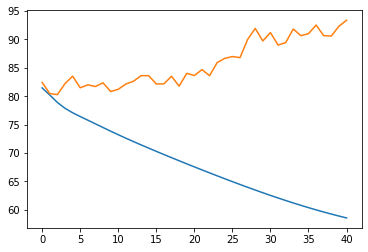

In [49]:
plt.plot(new_test.p1)
plt.plot(new_test.Open)

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(new_test['Open'],new_test['p1']))
print(rmse)
     

20.391678501682556


In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(new_test['High'],new_test['p2']))
print(rmse)
     

20.728301982330777


In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(new_test['Low'],new_test['p3']))
print(rmse)
     

20.535563121590247


In [53]:
len(df1)

251

In [54]:
future_input = df1[239:]
future_input.shape

(12, 5)

In [55]:
scaled_future = scaler.transform(future_input)

In [56]:
x_input= scaled_future.reshape((1, n_input,5))

In [57]:
x_input.shape

(1, 12, 5)

In [58]:
x_input

array([[[1.24275731, 1.18595144, 1.19814617, 1.16150493, 1.16334245],
        [1.28617017, 1.25078607, 1.27259732, 1.22340571, 1.22511796],
        [1.22178923, 1.15918988, 1.16267899, 1.18373299, 1.18552553],
        [1.23389769, 1.22374853, 1.22481957, 1.2459152 , 1.24758189],
        [1.30448043, 1.21629955, 1.24768253, 1.19864545, 1.2004078 ],
        [1.27022257, 1.19974605, 1.2494414 , 1.18823476, 1.19001819],
        [1.28055914, 1.24968248, 1.29487416, 1.25182389, 1.25347863],
        [1.32515312, 1.23754314, 1.25354498, 1.17894958, 1.18075179],
        [1.27022257, 1.24719934, 1.28227019, 1.23522309, 1.23691142],
        [1.26845071, 1.23064583, 1.27611479, 1.2290332 , 1.23073406],
        [1.31895132, 1.26623595, 1.32858251, 1.28361837, 1.28520876],
        [1.35025573, 1.26899484, 1.34177262, 1.27883515, 1.28043522]]])

In [59]:
future_input

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-03-13,89.699997,90.730003,87.660004,88.970001,88.970001
2023-03-14,91.169998,93.080002,90.199997,91.169998,91.169998
2023-03-15,88.989998,89.760002,86.449997,89.760002,89.760002
2023-03-16,89.400002,92.099998,88.570000,91.970001,91.970001
2023-03-17,91.790001,91.830002,89.349998,90.290001,90.290001
2023-03-20,90.629997,91.230003,89.410004,89.919998,89.919998
2023-03-21,90.980003,93.040001,90.959999,92.180000,92.180000
2023-03-22,92.489998,92.599998,89.550003,89.589996,89.589996
2023-03-23,90.629997,92.949997,90.529999,91.589996,91.589996


In [60]:
future_input.shape

(12, 5)

In [65]:
prediction= model.predict(x_input)

1/1 [==============================] - 0s 32ms/step


# Next day Prediction

In [66]:
scaler.inverse_transform(prediction)

array([[88.96789 , 91.225784, 88.16399 , 90.58042 , 90.27108 ]],
      dtype=float32)